In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('./Car_sales.csv', sep=',')
df.head()

#df.dropna(subset=['__year_resale_value', 'Horsepower', 'Engine_size', 'Power_perf_factor'], inplace=True)
df.dropna(inplace=True)

In [71]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


array([[<Axes: title={'center': 'Price_in_thousands'}>]], dtype=object)

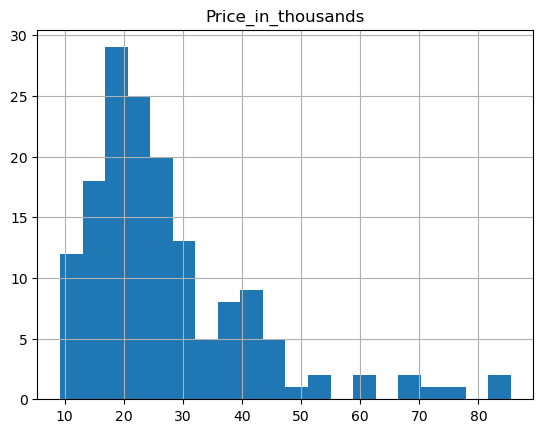

In [68]:
# distribucion del precio
df.hist('Price_in_thousands', bins=20)

In [79]:
# CORRELATION 
corr_matrix = df[['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']].corr().round(2)

corr_matrix.style.background_gradient(cmap='Blues')

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.280000,-0.300000,0.020000,-0.200000,0.360000,0.140000,0.250000,0.010000,0.090000,-0.020000,-0.220000
__year_resale_value,-0.280000,1.000000,0.950000,0.530000,0.770000,-0.050000,0.180000,0.030000,0.360000,0.330000,-0.400000,0.830000
Price_in_thousands,-0.300000,0.950000,1.000000,0.630000,0.840000,0.110000,0.330000,0.160000,0.530000,0.420000,-0.490000,0.900000
Engine_size,0.020000,0.530000,0.630000,1.000000,0.840000,0.470000,0.690000,0.540000,0.760000,0.660000,-0.730000,0.820000
Horsepower,-0.200000,0.770000,0.840000,0.840000,1.000000,0.290000,0.540000,0.390000,0.610000,0.500000,-0.610000,0.990000
Wheelbase,0.360000,-0.050000,0.110000,0.470000,0.290000,1.000000,0.680000,0.840000,0.650000,0.650000,-0.500000,0.260000
Width,0.140000,0.180000,0.330000,0.690000,0.540000,0.680000,1.000000,0.710000,0.720000,0.660000,-0.600000,0.510000
Length,0.250000,0.030000,0.160000,0.540000,0.390000,0.840000,0.710000,1.000000,0.630000,0.560000,-0.450000,0.350000
Curb_weight,0.010000,0.360000,0.530000,0.760000,0.610000,0.650000,0.720000,0.630000,1.000000,0.860000,-0.820000,0.610000
Fuel_capacity,0.090000,0.330000,0.420000,0.660000,0.500000,0.650000,0.660000,0.560000,0.860000,1.000000,-0.800000,0.500000


In [109]:
# Definir la variable dependiente y las variables independientes
X = df[['__year_resale_value', 'Horsepower', 'Engine_size', 'Power_perf_factor', 'Fuel_efficiency']]
Y = df['Price_in_thousands']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, Y)

# Coeficientes del modelo
intercept = model.intercept_
coefficients = model.coef_

# Variables independientes
variables = X.columns

# Construir la fórmula de la regresión lineal
formula = f"Y = {intercept:.2f}"
for var, coef in zip(variables, coefficients):
    formula += f" + ({coef:.2f} * {var})"
# Mostrar la fórmula
print(formula)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

# Predecir las calificaciones para los datos de prueba
Y_pred = model.predict(X_test)
# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MSE:", mse)
print("R^2:", r2)

Y = -2.70 + (0.89 * __year_resale_value) + (0.07 * Horsepower)
MSE: 7.332506538880569
R^2: 0.8940569631037634


c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


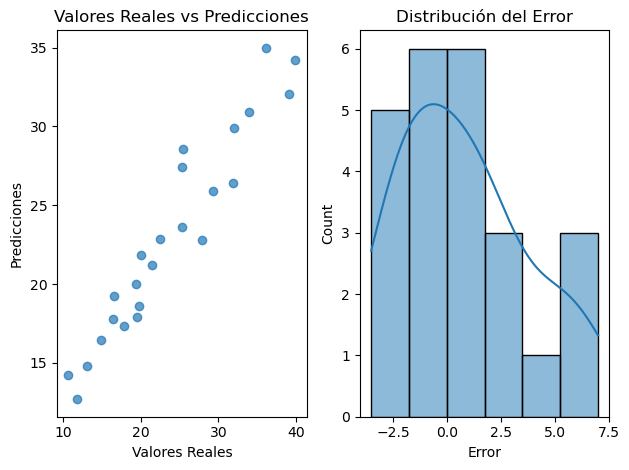

In [101]:
# Graficar los datos de prueba reales vs predicciones
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Graficar el error de las predicciones
plt.subplot(1, 2, 2)
sns.histplot(Y_test - Y_pred, kde=True)
plt.xlabel('Error')
plt.title('Distribución del Error')

plt.tight_layout()
plt.show()

In [57]:
# Assuming you have the model trained and evaluated as shown in the previous code

# New car characteristics (replace with actual values)
new_car_data = [[1600, 100000, 5, 2018]]  # Engine type, km_driven, seats, year

# Predict sales price for the new car
predicted_price = model.predict(new_car_data)

print("Predicted sales price:", predicted_price[0])  # Assuming 'predicted_price' is a NumPy array

Predicted sales price: 1136461.625807643


c:\Users\ivana\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
